In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# load dataset
try:
    df = pd.read_csv('emotion_dataset_raw.csv')
except:
    print('No such dataset...........')

In [4]:
# check the first 5 elements
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
# check the last 5 elements
df.tail()

,Emotion,Text
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."
34791,sadness,"I think about you baby, and I dream about you ..."


In [6]:
# check shape
df.shape

(34792, 2)

In [7]:
# check number of columns
df.columns

Index(['Emotion', 'Text'], dtype='object')

In [8]:
# more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [9]:
# check datatypes of all the columns -> 

df.dtypes

Emotion    object
Text       object
dtype: object

In [10]:
# check count 
df.count()

Emotion    34792
Text       34792
dtype: int64

In [11]:
# statistics summary about dataset
df.describe().T

,count,unique,top,freq
Emotion,34792,8,joy,11045
Text,34792,31110,Yes .,76


In [12]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

df.nunique()

Emotion        8
Text       31110
dtype: int64

Text(0.5, 1.0, 'Cardinality')

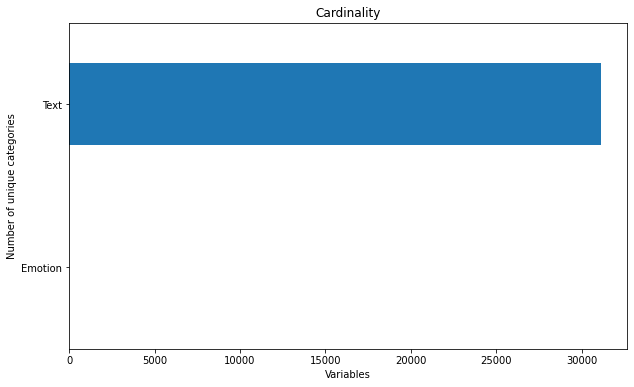

In [13]:
# plot the cardinality:

df.nunique().plot.barh(figsize=(10,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [14]:
# display categorical features/columns -> 

categorical_columns = df.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['Emotion', 'Text'], dtype='object')

In [15]:
# display numerical features/columns -> 

numerical_columns = df.select_dtypes(include=[np.number]).columns

numerical_columns

Index([], dtype='object')

===============

In [16]:
# Let's replace the empty strings with NaN values

df = df.replace(' ', np.nan)

In [17]:
#Let's replace the question marks (?) with NaN values

df = df.replace('?', np.nan)

In [18]:
#Let's replace the question marks (.) with NaN values

df = df.replace('.', np.nan)

In [19]:
#Let's replace \N (always add an extra forward class)-> (\\N) with NaN values

df = df.replace('\\N', np.nan)

`Part 2`

`Exploratory Data Analysis`

In [20]:
df.sample(n=1)

,Emotion,Text
23980,joy,My old boyfriend - yes the same one - asked me...


In [21]:
df.Emotion.nunique()

8

In [22]:
df.Emotion.unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [23]:
df.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

Text(0, 0.5, 'Count')

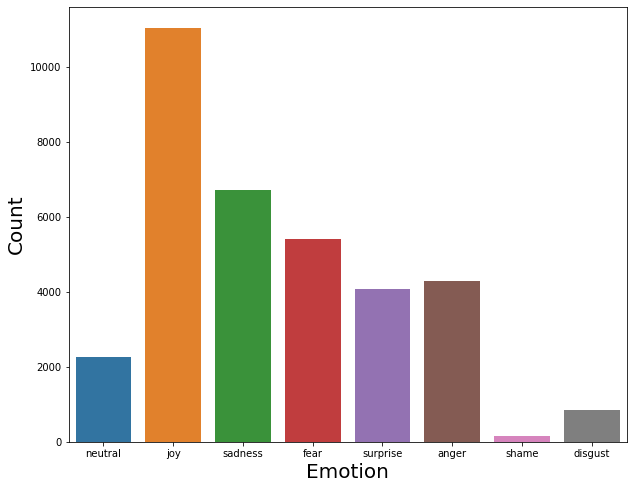

In [24]:
# visualization

plt.figure(figsize = (10,8))
sns.countplot(x = 'Emotion', data = df)
plt.xlabel("Emotion", size = 20)
plt.ylabel("Count", size = 20)

`END`

======================

`Part 3`

`Cleaning (Data Preparation)`

In [25]:
df.sample(n=2)

,Emotion,Text
12201,anger,I hate when you plan an outfit in your head an...
21164,surprise,Branson was nonplussed by Elliott 's refusal ;...


In [26]:
# remove user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [27]:
# remove stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
# remove special characters such as ?

#df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_cha)

`Feature Engineering`

In [28]:
XFeatures = df['Clean_Text']

In [29]:
ylabels = df['Emotion']

`Machine Learning`

In [30]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    XFeatures, ylabels, test_size=0.3, random_state=42
)

In [34]:
# model building
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression()),
])

In [35]:
# Train and fit data
pipe_lr.fit(
    X_train, y_train
)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [36]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [37]:
# check for accuracy
pipe_lr.score(X_test, y_test)

0.619946349875455

In [40]:
# to know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

`Model Deployment`

In [41]:
# model deployment with joblib
import joblib
pipeline_file = open('Emotion_Classifier_pipe_lr.pkl','wb')
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()

In [42]:
# model deployment with pickle
import pickle
pickle.dump(pipe_lr, open('pipe_lr_pickle.pkl', 'wb'))